<a href="https://colab.research.google.com/github/Saulcuervo03/Actividad4/blob/main/Actividad_4_Regresi%C3%B3n_Lineal_Y_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#Cargamos librerias 
#Importar librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.special as special 
from scipy.optimize import curve_fit 
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

Realizado por: 
Saúl Jesús Cuervo Méndez,
Omar Eduardo Pelcastre Reyes 

In [ ]:
#Cargar archivo csv desde seaborn
from google.colab import files 
files.upload()

In [115]:
#Carga desde un archivo .xlsx sin indice 
data= pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')

**Método de eliminación de valores nulos**

In [116]:
#Identificar valores nulos por columna 
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    125
318_shopkeeper_name                     249
319_shopkeepers_last_name               252
236_whatsapp                            255
235_email                               283
Length: 106, dtype: int64

In [117]:
#Sustituir valores nulos por un str en concreto 
#data["268_number_fridges"]= data["268_number_fridges"].fillna("no_existe_información")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_existe_información". 

In [118]:
#Sustituir valores nulos por un str en concreto 
data["pictures_of_shelves_if_possible"]= data["pictures_of_shelves_if_possible"].fillna("no_photo")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_photo". 

In [119]:
#Sustituir valores nulos por un str en concreto 
data["233_date_establishment"]= data["233_date_establishment"].fillna("no_info")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_info". 

In [120]:
#Sustituir valores nulos por un str en concreto 
#data["2_current_permanent_employees"]= data["2_current_permanent_employees"].fillna("no_cuenta_con_empleados_permanentes")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_cuenta_con_empleados_permanentes". 

In [121]:
#Sustituir valores nulos por un str en concreto 
#data["4_number_permanent_employees_last_year"]= data["4_number_permanent_employees_last_year"].fillna("no_tiene_información")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_tiene_información". 

In [122]:
#Sustituir valores nulos por un str en concreto 
data["5_change_store_space_last_year"]= data["5_change_store_space_last_year"].fillna("no_info")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_info". 

In [123]:
#Sustituir valores nulos por un str en concreto 
data["6_change_employees_average_salary_last_year"]= data["6_change_employees_average_salary_last_year"].fillna("sin_contestar")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "sin_contestar". 

In [124]:
#Sustituir valores nulos por valores no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas 
data["20_reviews_finances_monthly"]=data["20_reviews_finances_monthly"].fillna(method="ffill")
#En este apartado se utilizo la sustitución de valores nulos por valores no nulos hacía adelante "forward"
#Rellenando los valores nulos con los str que se encuentran adelante del valor nulo.

In [125]:
#Sustituir valores nulos por un str en concreto 
data["49_inventory_records"]= data["49_inventory_records"].fillna("no_info")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_info". 

In [126]:
#Sustituir valores nulos por un str en concreto 
data["18_sales_records"]= data["18_sales_records"].fillna("no_info")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_info". 

In [127]:
#Sustituir valores nulos por un str en concreto 
data["155_sales_registers_used_for"]= data["155_sales_registers_used_for"].fillna("no_info")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_info". 

In [128]:
#Sustituir valores nulos por un str en concreto 
#data["103_number_own_fridges"]= data["103_number_own_fridges"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "no_info". 

In [129]:
#Sustituir valores nulos por valores no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas 
data["19_tax_id"]=data["19_tax_id"].fillna(method="ffill")
#En este apartado se utilizo la sustitución de valores nulos por valores no nulos hacía adelante "forward"
#Rellenando los valores nulos con los str que se encuentran adelante del valor nulo.

In [130]:
#Sustituir valores nulos por un str en concreto 
#data["145_number_direct_competitors"]= data["103_number_own_fridges"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing". 

In [131]:
#Sustituir valores nulos por un str en concreto 
data["310_burnout"]= data["310_burnout"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing". 

In [132]:
#Sustituir valores nulos por un str en concreto 
#data["24_burnout"]= data["24_burnout"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing". 

In [133]:
#Sustituir valores nulos por un str en concreto 
data["186_internet_connection"]= data["186_internet_connection"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing". 

In [134]:
#Sustituir valores nulos por un str en concreto 
data["210_sales_channels"]= data["210_sales_channels"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [135]:
#Sustituir valores nulos por un str en concreto 
data["189_payment_methods"]= data["189_payment_methods"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing". 

In [136]:
#Sustituir valores nulos por un str en concreto 
data["28_prefered_payment_method"]= data["28_prefered_payment_method"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing". 

In [137]:
#Sustituir valores nulos por un str en concreto 
data["31_different_prices_payment_method"]= data["31_different_prices_payment_method"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [138]:
#Sustituir valores nulos por un str en concreto 
data["269_cash_discount"]= data["269_cash_discount"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [139]:
#Sustituir valores nulos por un str en concreto 
data["270_card_extra_charge"]= data["270_card_extra_charge"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [140]:
#Sustituir valores nulos por un str en concreto 
data["271_card_fee"]= data["271_card_fee"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [141]:
#Sustituir valores nulos por un str en concreto 
#data["272_card_days_receive_money"]= data["272_card_days_receive_money"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [142]:
#Sustituir valores nulos por un str en concreto 
data["273_platform_extra_charge"]= data["273_platform_extra_charge"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [143]:
#Sustituir valores nulos por un str en concreto 
data["274_platform_fee"]= data["274_platform_fee"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [144]:
#Sustituir valores nulos por un str en concreto 
data["275_platform_days_receive_money"]= data["275_platform_days_receive_money"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [145]:
#Sustituir valores nulos por un str en concreto 
data["30_payment_methods_large_purchases"]= data["30_payment_methods_large_purchases"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [146]:
#Sustituir valores nulos por un str en concreto 
data["214_customer_relationship_tools"]= data["214_customer_relationship_tools"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [147]:
#Sustituir valores nulos por un str en concreto 
data["33_credit_to_customers"]= data["33_credit_to_customers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [148]:
#Sustituir valores nulos por un str en concreto 
#data["276_expected_days_informal_credit"]= data["276_expected_days_informal_credit"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [149]:
#Sustituir valores nulos por un str en concreto 
data["35_interest_rate"]= data["35_interest_rate"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [150]:
#Sustituir valores nulos por un str en concreto 
#data["36_credit_default_rate"]= data["36_credit_default_rate"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [151]:
#Sustituir valores nulos por un str en concreto 
data["38_average_margin_profits"]= data["38_average_margin_profits"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [152]:
#Sustituir valores nulos por un str en concreto 
data["193_sales_planning_tools"]= data["193_sales_planning_tools"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [153]:
#Sustituir valores nulos por un str en concreto 
data["227_agreement_ecommerce_platforms"]= data["227_agreement_ecommerce_platforms"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [154]:
#Sustituir valores nulos por un str en concreto 
data["60_services"]= data["60_services"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [155]:
#Sustituir valores nulos por un str en concreto 
#data["315_frequency_topups"]= data["315_frequency_topups"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [156]:
#Sustituir valores nulos por un str en concreto 
#data["316_frequency_utility_bills"]= data["316_frequency_utility_bills"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [157]:
#Sustituir valores nulos por un str en concreto 
#data["317_home_deliveries"]= data["317_home_deliveries"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [158]:
#Sustituir valores nulos por un str en concreto 
#data["62_frequency_only_services"]= data["62_frequency_only_services"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [159]:
#Sustituir valores nulos por un str en concreto 
#data["78_number_home_deliveries_week"]= data["78_number_home_deliveries_week"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [160]:
#Sustituir valores nulos por un str en concreto 
data["77_delivery_timeslots"]= data["77_delivery_timeslots"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [161]:
#Sustituir valores nulos por un str en concreto 
data["79_delivery_vehicle"]= data["79_delivery_vehicle"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [162]:
#Sustituir valores nulos por un str en concreto 
data["64_comission_services"]= data["64_comission_services"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [163]:
#Sustituir valores nulos por un str en concreto 
data["66_percentaje_services_income"]= data["66_percentaje_services_income"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [164]:
#Sustituir valores nulos por un str en concreto 
data["69_why_not_services"]= data["69_why_not_services"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [165]:
#Sustituir valores nulos por un str en concreto 
data["311_topups"]= data["311_topups"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [166]:
#Sustituir valores nulos por un str en concreto 
data["312_payment_of_utilities"]= data["312_payment_of_utilities"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [167]:
#Sustituir valores nulos por un str en concreto 
data["313_home_deliveries"]= data["313_home_deliveries"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [168]:
#Sustituir valores nulos por un str en concreto 
data["314_reception_delivery_packages"]= data["314_reception_delivery_packages"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [169]:
#Sustituir valores nulos por un str en concreto 
data["42_willingness_share_inventory_data_suppliers"]= data["42_willingness_share_inventory_data_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [170]:
#Sustituir valores nulos por un str en concreto 
data["44_willingness_inventory_management_suppliers"]= data["44_willingness_inventory_management_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [171]:
#Sustituir valores nulos por un str en concreto 
data["45_willingness_reorder_suppliers"]= data["45_willingness_reorder_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [172]:
#Sustituir valores nulos por un str en concreto 
data["46_willingness_reorder_suppliers_variety"]= data["46_willingness_reorder_suppliers_variety"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [173]:
#Sustituir valores nulos por un str en concreto 
data["47_willingness_reorder_suppliers_lower_prices"]= data["47_willingness_reorder_suppliers_lower_prices"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [174]:
#Sustituir valores nulos por un str en concreto 
data["43_willingness_share_sales_data_suppliers"]= data["43_willingness_share_sales_data_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [175]:
#Sustituir valores nulos por un str en concreto 
data["58_willingness_share_sales_data_mse"]= data["58_willingness_share_sales_data_mse"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [176]:
#Sustituir valores nulos por un str en concreto 
data["59_willingness_share_sales_data_mse_better_prices"]= data["59_willingness_share_sales_data_mse_better_prices"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [177]:
#Sustituir valores nulos por un str en concreto 
#data["172_supplier_frequency"]= data["172_supplier_frequency"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [178]:
#Sustituir valores nulos por un str en concreto 
data["185_place_orders_suppliers"]= data["185_place_orders_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [179]:
#Sustituir valores nulos por un str en concreto 
data["53_special_conditions_suppliers"]= data["53_special_conditions_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [180]:
#Sustituir valores nulos por un str en concreto 
data["278_credit_interest"]= data["278_credit_interest"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [181]:
#Sustituir valores nulos por un str en concreto 
data["192_procurement_planning_tools"]= data["192_procurement_planning_tools"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [182]:
#Sustituir valores nulos por un str en concreto 
data["277_payment_method_suppliers"]= data["277_payment_method_suppliers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [183]:
#Sustituir valores nulos por un str en concreto 
data["56_procurement_changes_pandemic"]= data["56_procurement_changes_pandemic"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [184]:
#Sustituir valores nulos por un str en concreto 
data["279_changes_procurement_pandemic"]= data["279_changes_procurement_pandemic"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [185]:
#Sustituir valores nulos por un str en concreto 
data["157_frequency_organize_shelves"]= data["157_frequency_organize_shelves"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [186]:
#Sustituir valores nulos por un str en concreto 
data["158_charact_organize_products_on_shelves"]= data["158_charact_organize_products_on_shelves"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [187]:
#Sustituir valores nulos por un str en concreto 
data["161_actions_stockouts"]= data["161_actions_stockouts"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [188]:
#Sustituir valores nulos por un str en concreto 
data["162_inventory_extra_space"]= data["162_inventory_extra_space"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [189]:
#Sustituir valores nulos por un str en concreto 
data["163_number_high_perishable_products"]= data["163_number_high_perishable_products"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [190]:
#Sustituir valores nulos por un str en concreto 
data["249_technology_training"]= data["249_technology_training"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [191]:
#Sustituir valores nulos por un str en concreto 
data["250_technology_investment_operations"]= data["250_technology_investment_operations"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [192]:
#Sustituir valores nulos por un str en concreto 
data["251_technology_investment_customers"]= data["251_technology_investment_customers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [193]:
#Sustituir valores nulos por un str en concreto 
data["254_technology_roadmap"]= data["254_technology_roadmap"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [194]:
#Sustituir valores nulos por un str en concreto 
data["260_technology_scalable"]= data["260_technology_scalable"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [195]:
#Sustituir valores nulos por un str en concreto 
data["261_technology_organization"]= data["261_technology_organization"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [196]:
#Sustituir valores nulos por un str en concreto 
data["262_technology_serve_customers"]= data["262_technology_serve_customers"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [197]:
#Sustituir valores nulos por un str en concreto 
data["263_technology_secure_sales"]= data["263_technology_secure_sales"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [198]:
#Sustituir valores nulos por un str en concreto 
data["264_technology_budget"]= data["264_technology_budget"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [199]:
#Sustituir valores nulos por un str en concreto 
data["267_technology_investment_customer_preferences"]= data["267_technology_investment_customer_preferences"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [200]:
#Sustituir valores nulos por un str en concreto 
data["234_willingness_participate_workshop"]= data["234_willingness_participate_workshop"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [201]:
#Sustituir valores nulos por un str en concreto 
data["318_shopkeeper_name"]= data["318_shopkeeper_name"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [202]:
#Sustituir valores nulos por un str en concreto 
data["319_shopkeepers_last_name"]= data["319_shopkeepers_last_name"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [203]:
#Sustituir valores nulos por un str en concreto 
data["236_whatsapp"]= data["236_whatsapp"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [204]:
#Sustituir valores nulos por un str en concreto 
data["235_email"]= data["235_email"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [205]:
#Sustituir valores nulos por un str en concreto 
data["228_store_name"]= data["228_store_name"].fillna("nothing")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str.
#Se sustituyo por la palabra "nothing".

In [206]:
#Corroboramos valores nulos 
valores_nulos=data.isnull().sum().sum()
valores_nulos

3428

In [207]:
data.info(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 106 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    _record_id                                                  object 
 1    _title                                                      object 
 2    _server_updated_at                                          object 
 3    _updated_by                                                 object 
 4    _geometry                                                   object 
 5    _latitude                                                   float64
 6    _longitude                                                  float64
 7    228_store_name                                              object 
 8    229_store_picture                                           object 
 9    232_type_of_store                                           object 
 10   

In [ ]:
#Filtro por columnas
filtro_col=data.iloc[ : , [0,1,2,3,4,5,6,7,8,10,11,12,15,17,18,19,20,23,24,25,26,27,28,30,32,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105]]
filtro_col

In [ ]:
#Filtro por columnas
filtro_i=data.iloc[ : , [13,14,16,21,22,29,31,33,42,49,51,56,57,58,59,60,78]]
filtro_i

In [ ]:
#Corroboramos valores nulos 
valores_nulos=filtro_i.isnull().sum()
valores_nulos

Procedemos a remplazar outliers 

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe 
fig = plt.figure(figsize =(15, 8))
filtro_i.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [ ]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(filtro_i["104_how_many_shelves_does_the_micro_retailer_have"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

Método de desviación estandar 
Esté método se aplico para sustituir valores atípicos del DataFrame, encontrando los valores extremos, como siguiente paso encontrar los outliers, y así obtener datos limpios, estos valores se remplazaron con "mean".

In [ ]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y=filtro_i
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Encontramos Outliers
outliers= filtro_i[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos limpios
filtroi_clean= filtro_i[(y<=Limite_Superior)&(y>=Limite_Inferior)]
filtroi_clean

In [ ]:
#Corroboramos valores nulos 
valores_nulos=filtroi_clean.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=filtroi_clean.copy()
data_clean=filtroi_clean.fillna(round(filtroi_clean.mean(),1))
data_clean

In [236]:
Microretailer_Datos_Limpios = pd.concat([data_clean, filtro_col], axis=1)
Microretailer_Datos_Limpios

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,1.0,3.0,3.0,2.0,10.0,3.0,5.0,2.0,0.9,10.8,...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,nothing,nothing,nothing,nothing
1,2.0,0.0,0.0,1.8,2.0,1.8,3.7,3.9,0.9,10.8,...,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing
2,2.0,0.0,0.0,1.8,2.0,1.8,3.7,3.9,0.9,10.8,...,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing
3,1.0,0.0,0.0,0.0,0.0,1.8,10.0,3.9,0.9,10.8,...,En desacuerdo,nothing,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,nothing,nothing,nothing,nothing
4,3.0,2.0,3.0,1.8,2.0,1.8,3.7,3.9,0.9,10.8,...,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.0,1.0,7.0,4.0,2.0,1.8,5.0,3.9,1.0,10.8,...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2212380183.0,Hachi401096@gmail.com
326,1.0,0.0,5.0,1.8,2.0,1.8,3.7,3.9,0.9,10.8,...,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing
327,3.0,1.0,1.0,1.8,2.0,1.8,3.7,3.9,0.9,10.8,...,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing
328,0.0,1.0,1.0,1.8,2.0,1.8,3.7,3.9,0.9,10.8,...,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing,nothing


In [379]:
#Convertir DataFrame a CSV 
Microretailer_Datos_Limpios.to_csv("Micro_limpio.csv")

In [380]:
#Descargar archivo filtrado en csv 
from google.colab import files 
files.download("Micro_limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Casos de Correlación

1.

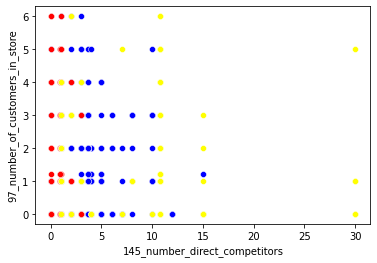

In [315]:
from turtle import color

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='272_card_days_receive_money', y='97_number_of_customers_in_store', color="red", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='276_expected_days_informal_credit', y='97_number_of_customers_in_store', color="yellow", data=Microretailer_Datos_Limpios)

In [316]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Microretailer_Datos_Limpios[['145_number_direct_competitors', '272_card_days_receive_money','276_expected_days_informal_credit']]
Var_Dep= Microretailer_Datos_Limpios['97_number_of_customers_in_store']

In [317]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [318]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [319]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [320]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['145_number_direct_competitors', '272_card_days_receive_money',
        '276_expected_days_informal_credit'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00085021, -0.54875961, -0.04272498]),
 '_residues': 584.871721249838,
 'rank_': 3,
 'singular_': array([61.45779777, 42.86544434,  5.71821799]),
 'intercept_': 2.144628746732185}

In [321]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.026489981050868083

MODELO PREDICTIVO

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Microretailer_Datos_Limpios[['268_number_fridges', '272_card_days_receive_money', '276_expected_days_informal_credit']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Microretailer_Datos_Limpios.insert(0, 'Predicciones1', y_pred)
Microretailer_Datos_Limpios

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='145_number_direct_competitors', y='Predicciones', color="red", data=Microretailer_Datos_Limpios)

In [326]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.026489981050868083

In [327]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.16275743009419902

2.

In [ ]:
from turtle import color
sns.scatterplot(x='268_number_fridges', y='4_number_permanent_employees_last_year', color="blue", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='104_how_many_shelves_does_the_micro_retailer_have', y='4_number_permanent_employees_last_year', color="red", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='2_current_permanent_employees', y='4_number_permanent_employees_last_year', color="yellow", data=Microretailer_Datos_Limpios)

In [329]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Microretailer_Datos_Limpios[['268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have','2_current_permanent_employees']]
Var_Dep= Microretailer_Datos_Limpios['4_number_permanent_employees_last_year']

In [330]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [331]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [332]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [334]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.3902233581613249

MODELO PREDICTIVO

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Microretailer_Datos_Limpios[['268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have','2_current_permanent_employees']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Microretailer_Datos_Limpios.insert(0, 'Predicciones2', y_pred)
Microretailer_Datos_Limpios

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='268_number_fridges', y='4_number_permanent_employees_last_year', color="blue", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='268_number_fridges', y='Predicciones2', color="red", data=Microretailer_Datos_Limpios)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

3.

In [ ]:
from turtle import color
sns.scatterplot(x='272_card_days_receive_money', y='97_number_of_customers_in_store', color="blue", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='24_burnout', y='97_number_of_customers_in_store', color="red", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='103_number_own_fridges', y='97_number_of_customers_in_store', color="yellow", data=Microretailer_Datos_Limpios)

In [336]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Microretailer_Datos_Limpios[['272_card_days_receive_money', '24_burnout','103_number_own_fridges']]
Var_Dep= Microretailer_Datos_Limpios['97_number_of_customers_in_store']

In [337]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [338]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [339]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [340]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['272_card_days_receive_money', '24_burnout',
        '103_number_own_fridges'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.50647616, -0.02379031,  0.14478249]),
 '_residues': 587.1092335826645,
 'rank_': 3,
 'singular_': array([18.50839261, 14.60575355,  5.7007923 ]),
 'intercept_': 1.4810264747192847}

In [341]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.022765676054767092

In [342]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.16275743009419902

MODELO PREDICTIVO

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Microretailer_Datos_Limpios[['272_card_days_receive_money', '24_burnout','103_number_own_fridges']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Microretailer_Datos_Limpios.insert(0, 'Predicciones3', y_pred)
Microretailer_Datos_Limpios

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='272_card_days_receive_money', y='97_number_of_customers_in_store', color="blue", data=Microretailer_Datos_Limpios)
sns.scatterplot(x='272_card_days_receive_money', y='Predicciones3', color="red", data=Microretailer_Datos_Limpios)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl



---



REGRESIÓN LOGÍSTICA

1.

In [343]:
#Declaramos las variables dependientes e independientes para la regresión logística
Vars_Indep= Microretailer_Datos_Limpios[['145_number_direct_competitors', '272_card_days_receive_money', '276_expected_days_informal_credit']]
Var_Dep= Microretailer_Datos_Limpios['108_does_the_micro_retailer_has_a_barred_window_']

In [344]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [345]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_micro, X_test, y_micro, y_test = train_test_split(X, y, test_size=0.3, random_state =None)


In [346]:
#Se escalan todos los datos
escalar= StandardScaler()

In [347]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_micro = escalar.fit_transform(X_micro)
X_test = escalar.transform(X_test)

In [348]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [349]:
#Entrenamos el modelo
algoritmo.fit(X_micro, y_micro)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred= algoritmo.predict(X_test)
y_pred 

In [351]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[71  1]
 [26  1]]


In [352]:
#Calculo la precisión del modelo 
from sklearn.metrics import precision_score
precision= precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.5


In [353]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud= accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.7272727272727273


In [354]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo')
print(sensibilidad)

Sensibilidad del modelo
0.037037037037037035


2.

In [355]:
#Declaramos las variables dependientes e independientes para la regresión logística
Vars_Indep= Microretailer_Datos_Limpios[['268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have','2_current_permanent_employees']]
Var_Dep= Microretailer_Datos_Limpios['99_does_the_micro_retailer_exhibits_products_outside_']

In [356]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [357]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_micro, X_test, y_micro, y_test = train_test_split(X, y, test_size=0.3, random_state =None)


In [358]:
#Se escalan todos los datos
escalar= StandardScaler()

In [359]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_micro = escalar.fit_transform(X_micro)
X_test = escalar.transform(X_test)

In [360]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [361]:
#Entrenamos el modelo
algoritmo.fit(X_micro, y_micro)

LogisticRegression()

In [362]:
#Realizamos una predicción
y_pred= algoritmo.predict(X_test)
y_pred 

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

In [363]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[66  0]
 [33  0]]


In [364]:
#Calculo la precisión del modelo 
from sklearn.metrics import precision_score
precision= precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [365]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud= accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.6666666666666666


In [366]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo')
print(sensibilidad)

Sensibilidad del modelo
0.0


3.

In [367]:
#Declaramos las variables dependientes e independientes para la regresión logística
Vars_Indep= Microretailer_Datos_Limpios[['272_card_days_receive_money', '24_burnout','103_number_own_fridges']]
Var_Dep= Microretailer_Datos_Limpios['102_does_the_micro_retailer_sells_fresh_products_']

In [368]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [369]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_micro, X_test, y_micro, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [370]:
#Se escalan todos los datos
escalar= StandardScaler()

In [371]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_micro = escalar.fit_transform(X_micro)
X_test = escalar.transform(X_test)

In [372]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [373]:
#Entrenamos el modelo
algoritmo.fit(X_micro, y_micro)

LogisticRegression()

In [374]:
#Realizamos una predicción
y_pred= algoritmo.predict(X_test)
y_pred 

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes'],
      dtype=object)

In [375]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[48  2]
 [41  8]]


In [376]:
#Calculo la precisión del modelo 
from sklearn.metrics import precision_score
precision= precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.8


In [377]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud= accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.5656565656565656


In [378]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo')
print(sensibilidad)

Sensibilidad del modelo
0.16326530612244897
